# 1. Color quantization k-means

For this problem you will write code to quantize a color space by applying k-means clustering to the pixels in a given input image. We will experiment with two different color spaces — RGB and HSV.

Implement each of the specified functions in the `quantization_student.py`. After each function there is a test on the 4x6 image that will be generated within this notebook. These test are to help you verify and debug your code. However, they will not cover every possible edge case. We encourage you to write additional test or debug your code line-by-line to make sure the functions work as expected.

> Note: to pass the tests in this notebook and on Gradescope you will need to use a random seed value of `101` whenever possible. Please check the docstrings for any of the 3rd party functions to make sure you set the random seed properly.

In [1]:
%load_ext autoreload
%autoreload 2
#export
import random
import numpy as np

from PIL import Image
from quantization_student import quantizeRGB, quantizeHSV, computeQuantizationError

In [2]:
import matplotlib.pyplot as plt

The commands in the following cell will plot all images/plots in an interactive window. If you would prefer to not have interactive plots, comment out %matplotlib notebook and uncomment %matplotlib inline instead.

You can use plt.rcParams['figure.figsize'] to make all the plots in this notebook bigger or smaller.

In [52]:
# %matplotlib notebook
%matplotlib inline

plt.rcParams['figure.figsize'] = (7, 3)

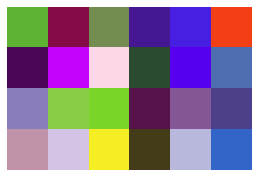

In [94]:
test_k = 4
np.random.seed(101)
test_img = np.random.randint(0, 256, size=(4, 6, 3), dtype=np.uint8)
_, ax = plt.subplots()
ax.axis("off")
ax.imshow(test_img)

## 1.1 Quantize in RGB space

Given an RGB image, quantize the 3-dimensional RGB space, and map each pixel in the input image to its nearest k-means center. That is, replace the RGB value at each pixel with its nearest cluster’s average RGB value.

Use the [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class to perfom the k-means clustering. See the documentation for details on how to use the class, and make sure you set `random_state=101`.

In [95]:
expected_quantized_img_rgb = np.array([[[159, 173,  49],
        [ 80,  34,  60],
        [159, 173,  49],
        [ 99,  60, 190],
        [ 99,  60, 190],
        [159, 173,  49]],

       [[ 80,  34,  60],
        [ 99,  60, 190],
        [209, 185, 212],
        [ 80,  34,  60],
        [ 99,  60, 190],
        [ 99,  60, 190]],

       [[ 99,  60, 190],
        [159, 173,  49],
        [159, 173,  49],
        [ 80,  34,  60],
        [ 99,  60, 190],
        [ 99,  60, 190]],

       [[209, 185, 212],
        [209, 185, 212],
        [159, 173,  49],
        [ 80,  34,  60],
        [209, 185, 212],
        [ 99,  60, 190]]], dtype=np.uint8)

quantized_img_rgb, _ = quantizeRGB(test_img, test_k)

if np.allclose(quantized_img_rgb, expected_quantized_img_rgb):
    print("\nQuantized image computed correctly!")
else:
    print("\nQuantized image is incorrect.")
    print(f"\nexpected:\n\n{expected_quantized_img_rgb}")
    print(f"\ncomputed:\n\n{quantized_img_rgb}")

[[159.33333333 173.16666667  49.33333333]
 [ 99.55555556  60.33333333 190.22222222]
 [ 80.6         34.2         60.8       ]
 [209.75       185.25       212.        ]]

Quantized image computed correctly!


Let's take a look at the results.

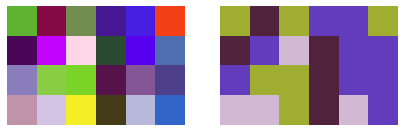

In [96]:
ig, axs = plt.subplots(1, 2)

axs[0].axis("off")
axs[0].imshow(test_img)

axs[1].axis("off")
axs[1].imshow(quantized_img_rgb)

# uncomment this line and change the filename as needed to save the figure
#fig.savefig(f"output-quantized-rgb-{k}.png", dpi=200, bbox_inches="tight")

## 1.2 Quantize in HSV space

Given an RGB image, convert it to HSV and quantize the 1-dimensional Hue space. Map each pixel in the input image to its nearest quantized Hue value, while keeping its Saturation and Value channels the same as the input. Convert the quantized output back to RGB color space.

Use the [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) class to perfom the k-means clustering. See the documentation for details on how to use the class, and make sure you set `random_state=101`.

Use the [skimage.color.rgb2hsv](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2hsv) and [skimage.color.hsv2rgb](https://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.hsv2rgb) functions to convert the image to HSV and back to RGB.

In [97]:
expected_quantized_img_hsv = np.array([[[ 94, 179,  49],
        [131,  11, 112],
        [101, 141,  81],
        [ 38,  23, 146],
        [ 55,  31, 227],
        [243, 166,  22]],

       [[ 87,   7,  74],
        [252,   3, 212],
        [253, 215, 246],
        [ 54,  75,  43],
        [ 29,   0, 239],
        [ 90,  79, 175]],

       [[132, 125, 187],
        [114, 205,  66],
        [ 99, 213,  40],
        [ 86,  17,  75],
        [149,  86, 139],
        [ 72,  63, 138]],

       [[192, 147, 184],
        [199, 195, 227],
        [245, 172,  36],
        [ 68,  53,  24],
        [187, 183, 220],
        [ 68,  49, 199]]], dtype=np.uint8)

quantized_img_hsv, _ = quantizeHSV(test_img, test_k)

if np.allclose(quantized_img_hsv, expected_quantized_img_hsv):
    print("\nQuantized image computed correctly!")
else:
    print("\nQuantized image is incorrect.")
    print(f"\nexpected:\n\n{expected_quantized_img_hsv}")
    print(f"\ncomputed:\n\n{quantized_img_hsv}")

ab
[[[0.27555859 0.72067039 0.70196078]
  [0.85972905 0.91666667 0.51764706]
  [0.27555859 0.42553191 0.55294118]
  [0.68746577 0.84246575 0.57254902]
  [0.68746577 0.86343612 0.89019608]
  [0.10922117 0.90946502 0.95294118]]

 [[0.85972905 0.91954023 0.34117647]
  [0.85972905 0.98412698 0.98823529]
  [0.85972905 0.15019763 0.99215686]
  [0.27555859 0.42666667 0.29411765]
  [0.68746577 1.         0.9372549 ]
  [0.68746577 0.54857143 0.68627451]]

 [[0.68746577 0.3315508  0.73333333]
  [0.27555859 0.67317073 0.80392157]
  [0.27555859 0.81220657 0.83529412]
  [0.85972905 0.79069767 0.3372549 ]
  [0.85972905 0.42281879 0.58431373]
  [0.68746577 0.54347826 0.54117647]]

 [[0.85972905 0.234375   0.75294118]
  [0.68746577 0.14473684 0.89411765]
  [0.10922117 0.85306122 0.96078431]
  [0.10922117 0.63235294 0.26666667]
  [0.68746577 0.16818182 0.8627451 ]
  [0.68746577 0.74874372 0.78039216]]]

Quantized image computed correctly!


Let's take a look at the results.

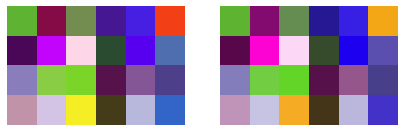

In [98]:
fig, axs = plt.subplots(1, 2)

axs[0].axis("off")
axs[0].imshow(test_img)

axs[1].axis("off")
axs[1].imshow(quantized_img_hsv)

# uncomment this line and change the filename as needed to save the figure
# fig.savefig(f"output-quantized-hsv-{k}.png", dpi=200, bbox_inches="tight")

## 1.3 Sum of squared error

Write a function to compute the SSD error (sum of squared error) between the original RGB pixel values and the quantized values

In [99]:
error_rgb = computeQuantizationError(test_img, quantized_img_rgb)
print(f"quantization error (rgb): {error_rgb:,}")

error_hsv = computeQuantizationError(test_img, quantized_img_hsv)
print(f"quantization error (hsv): {error_hsv:,}")

quantization error (rgb): 112,251
quantization error (hsv): 33,167


In [100]:
if error_rgb == 112251:
    print("\nQuantization error computed correctly!")
else:
    print("\nQuantization error incorrect")
    print(f"\nexpected: 112,251\ncomputed: {error_rgb}")


if error_hsv == 33167:
    print("\nQuantization error computed correctly!")
else:
    print("\nQuantization error incorrect")
    print(f"\nexpected: 33,167\ncomputed: {error_hsv}")


Quantization error computed correctly!

Quantization error computed correctly!


Now let's look at the outputs when quantization is performed on real images. Make sure to include results from this part in your report.

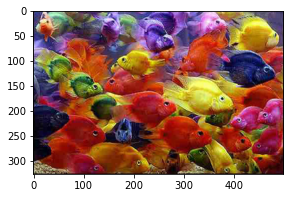

In [101]:
im = Image.open('data/fish.jpg')
im = np.asarray(im, dtype = np.uint8)
im.shape
plt.imshow(im)

In [102]:
def run_quantization(im: np.ndarray, n_k: int, color_space: str ='RGB') -> None:
    """Performs color quantization on the input image for all 
    the input number of clusters, assuming the input colorspace.

    Args:
        im: Input image, assumed to be an ndarray.
        n_k: list of cluster centers to perform quantization on.
        color_space: used to decide which function to call.

    Returns:
        quantized_imgs: list of quantized images
        cluster_centers: list of cluster centers of the generated 
                         clusters at each k. 
        quantization_errors: computed quantization error between 
                             the generated image and original image.
    """
    quantized_imgs = []
    cluster_centers = []
    quantization_errors = []
    
    for k in n_k:
        if(color_space == 'RGB' or color_space == 'rgb'):
            quantized_img, cluster_center = quantizeRGB(im, k)
        elif(color_space == 'HSV' or color_space == 'hsv'):
            quantized_img, cluster_center = quantizeHSV(im, k)
        else:
            print("Error: Enter either \'RGB\' or \'HSV\' as a colorspace")
            return
            
        quantized_imgs.append(quantized_img)
        cluster_centers.append(cluster_center)
        quantization_errors.append(
            np.log(computeQuantizationError(im, quantized_img))
        )
    
    nrows = int(np.ceil(len(n_k)/2))
    ncols = 2
    fig,axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(nrows*10,20))

    for ax in axes.flatten():
        ax.axis('off')

    for i, k in enumerate(n_k):
        title = 'K = '+str(k)+", err = e^("+str(quantization_errors[i]) + ")"
        
        if(nrows > 1):
            axes[i//ncols, i%ncols].imshow(np.asarray(quantized_imgs[i], dtype=int))
            axes[i//ncols, i%ncols].set_title(title)
        else:
            axes[i].imshow(np.asarray(quantized_imgs[i], dtype=int))
            axes[i].set_title(title)

    plt.show()

[[ 58.77072164  41.7995711   62.13407109]
 [182.6300816  156.58640276 122.65277674]
 [154.68048161  58.11961122  25.39489994]]
[[ 44.73241263  27.19788627  34.9369124 ]
 [ 99.01661081  75.0939458  112.2454466 ]
 [152.69862441  50.56412954  22.62469247]
 [194.91450836 168.12155549  63.71073633]
 [181.69313892 148.21145733 189.68921619]]
[[ 70.50795718  56.13445093 107.01653735]
 [103.56918708  83.36073837  37.93375932]
 [129.76283267  24.14925129  15.01301249]
 [216.40889049 207.8923783   94.94753892]
 [178.3413818  146.23554885  36.97992258]
 [201.88606159 167.87649919 216.22706645]
 [ 32.53039419  19.6222265   30.0035135 ]
 [171.38857241  72.55498015  86.4874849 ]
 [136.06908158 110.99334829 156.75476839]
 [180.12742953  65.41373836  19.69888875]]


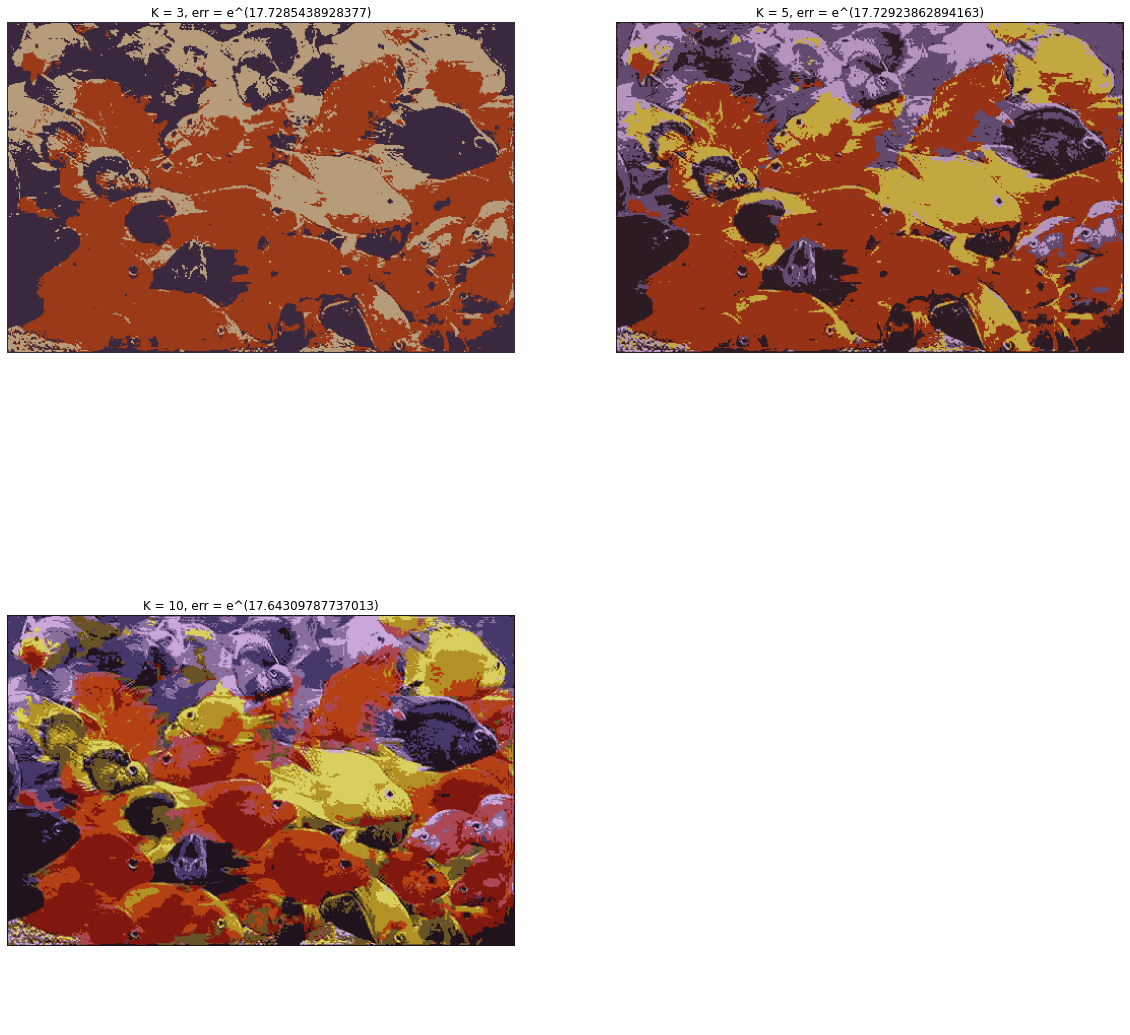

In [39]:
run_quantization(im, n_k = [3, 5, 10], color_space='RGB')

ab
[[[0.69190267 1.         0.09019608]
  [0.69190267 0.84615385 0.15294118]
  [0.69190267 0.97727273 0.17254902]
  ...
  [0.69190267 0.70689655 0.22745098]
  [0.69190267 0.77358491 0.20784314]
  [0.69190267 1.         0.14117647]]

 [[0.69190267 0.76470588 0.13333333]
  [0.69190267 0.5483871  0.24313725]
  [0.69190267 0.55844156 0.30196078]
  ...
  [0.69190267 0.47674419 0.3372549 ]
  [0.69190267 0.56164384 0.28627451]
  [0.69190267 0.83673469 0.19215686]]

 [[0.69190267 0.5625     0.18823529]
  [0.69190267 0.41666667 0.32941176]
  [0.69190267 0.41904762 0.41176471]
  ...
  [0.69190267 0.36607143 0.43921569]
  [0.69190267 0.44565217 0.36078431]
  [0.69190267 0.66129032 0.24313725]]

 ...

 [[0.08768584 1.         0.08627451]
  [0.08768584 0.2371134  0.38039216]
  [0.08768584 0.18867925 0.62352941]
  ...
  [0.93795954 0.8627451  0.2       ]
  [0.93795954 0.90243902 0.16078431]
  [0.93795954 0.94117647 0.13333333]]

 [[0.08768584 1.         0.07058824]
  [0.08768584 0.31944444 0.2823529

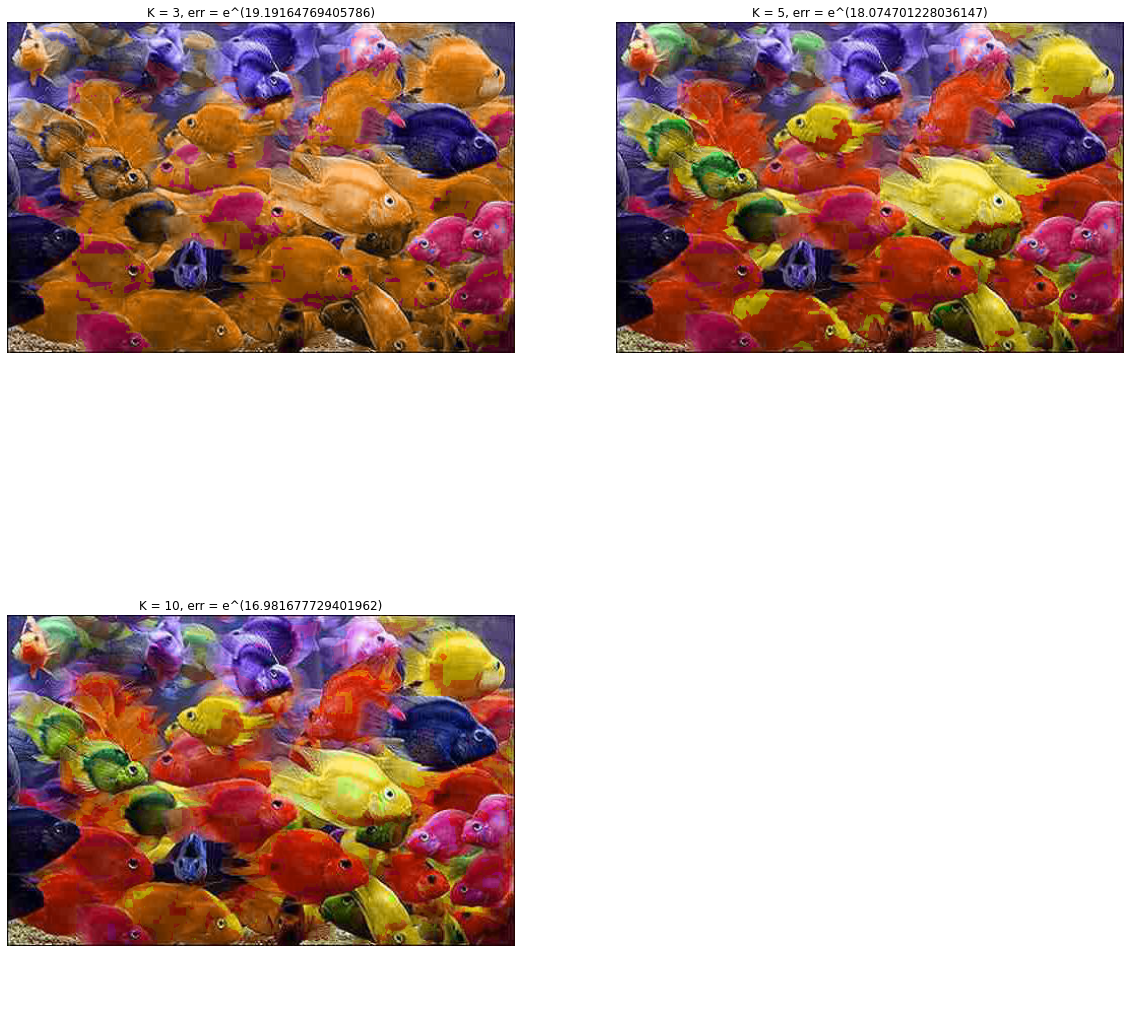

In [92]:
run_quantization(im, n_k = [3, 5, 10], color_space='HSV')

# 2. Hough Transform

The Hough transform is a feature extraction technique used in image analysis, computer vision, and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure. This voting procedure is carried out in a parameter space, from which object candidates are obtained as local maxima in a so-called accumulator space that is explicitly constructed by the algorithm for computing the Hough transform.

![alt text](ideal.jfif "Title")

Source: Wikipedia 
Image source: Google Images

For this problem you will be implementing a Hough Transform based circle detector that takes an input image and a fixed radius,
and returns the centers and radii of any detected circles of about that size and the Hough space used
for finding the centers. Implement the `detectCircles()` function in `detect_circles_student.py`. 

We will use some tests to verify your implementation. These tests are to help you verify and debug your code. However, they will not cover every possible edge case. We encourage you to write additional test or debug your code line-by-line to make sure the functions work as expected.

In [3]:
from detect_circles_student import detectCircles, showCircles
from test_simple import PS04Test
Checker = PS04Test()

Running on Linux/OS X system


## 2.1 Circle Detection

Running basic tests on your implementation

Testing circle detector on Red circle
[[210 654  75]]


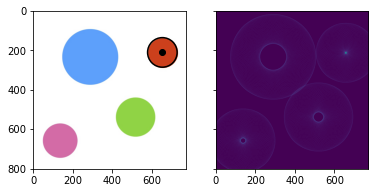

UnitTest testHoughTransform passed successfully!
Testing circle detector on Pink circle
[[657 139  90]
 [659 136  90]]


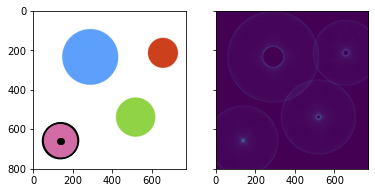

UnitTest testHoughTransform passed successfully!
Testing circle detector on Green circle
[[537 517 100]]


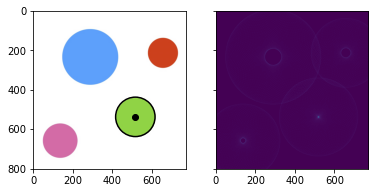

UnitTest testHoughTransform passed successfully!
Testing circle detector on Blue circle
[[230 287 143]
 [231 286 143]
 [232 290 143]
 [234 288 143]]


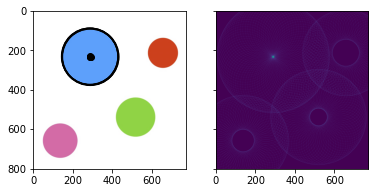

UnitTest testHoughTransform passed successfully!
UnitTest testDetectCircles (useGradient set to False) passed successfully!
**************************************************


In [24]:
Checker.testDetectCircles(detectCircles, False)

Testing circle detector on Red circle


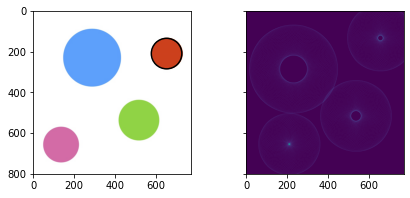

UnitTest testHoughTransform passed successfully!
Testing circle detector on Pink circle


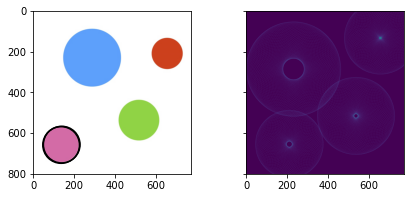

UnitTest testHoughTransform passed successfully!
Testing circle detector on Green circle


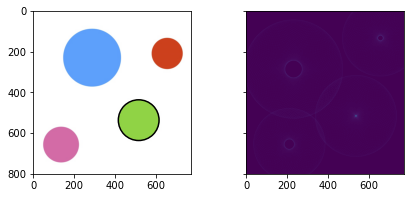

UnitTest testHoughTransform passed successfully!
Testing circle detector on Blue circle


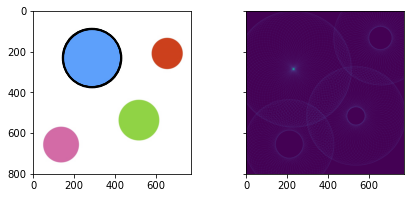

UnitTest testHoughTransform passed successfully!
UnitTest testDetectCircles (useGradient set to False) passed successfully!
**************************************************


In [114]:
Checker.testDetectCircles(detectCircles, False)

Testing circle detector on Red circle
[[210 654  75]]


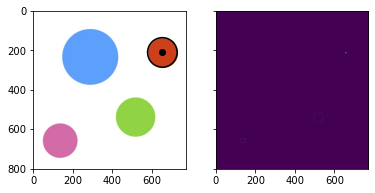

UnitTest testHoughTransformGradient passed successfully!
Testing circle detector on Pink circle
[[659 136  90]
 [659 137  90]]


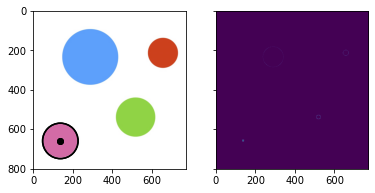

UnitTest testHoughTransformGradient passed successfully!
Testing circle detector on Green circle
[[537 517 100]]


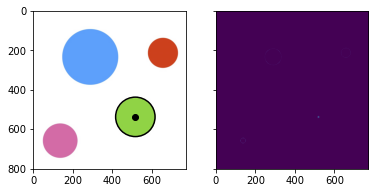

UnitTest testHoughTransformGradient passed successfully!
Testing circle detector on Blue circle
[[230 287 143]]


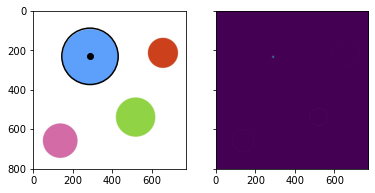

UnitTest testHoughTransformGradient passed successfully!
UnitTest testDetectCircles (useGradient set to True) passed successfully!
**************************************************


In [25]:
Checker.testDetectCircles(detectCircles, True)

[[248 305 118]
 [250 303 118]]


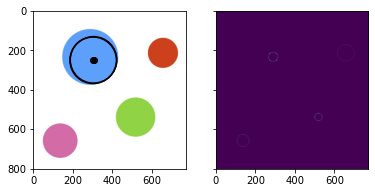

[[211 660  81]
 [216 655  81]
 [651 132  81]]


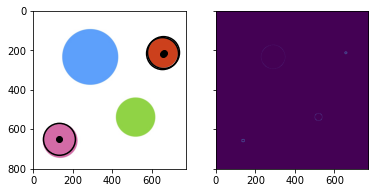

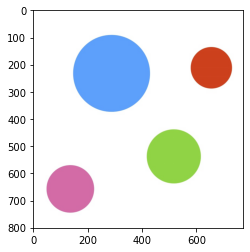

In [26]:
im_syn = Image.open("data/im1.jpg")
im_syn = np.asarray(im_syn, dtype = np.uint8)
im_syn.shape
detectCircles(im_syn, 118, 0.9, True)
detectCircles(im_syn, 81, 0.9, True)
plt.imshow(im_syn)

[[ 53 158  18]
 [ 82 186  18]
 [140 149  18]
 [140 153  18]
 [142 150  18]
 [160 274  18]
 [161  31  18]]


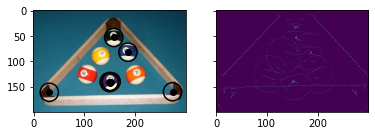

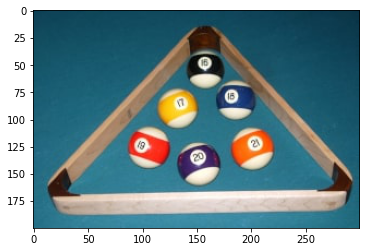

In [27]:
im_real = Image.open("data/biliards.jpg")
im_real = np.asarray(im_real, dtype = np.uint8)

detectCircles(im_real, 18, 0.7, True)
plt.imshow(im_real)

As stated in 2.2 and 2.3, visualize the detected circles for the above images and include them in your report. You may use the `showCircles()` function.